## Task2: Location-based Analysis

In [51]:
#import models
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
#read csv 
df=pd.read_csv("12.Dataset.csv")

In [53]:
#check null vallue
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [55]:
df.dropna(subset='Cuisines',inplace=True)

### Task1: Mapping Latitude and Longitude to visualise Restarent

In [56]:
#change dataframe to geodataframe
dfg=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude,df.Latitude))

In [57]:
#Read world map
world=gpd.read_file('110m_cultural/ne_110m_admin_0_countries.shp')

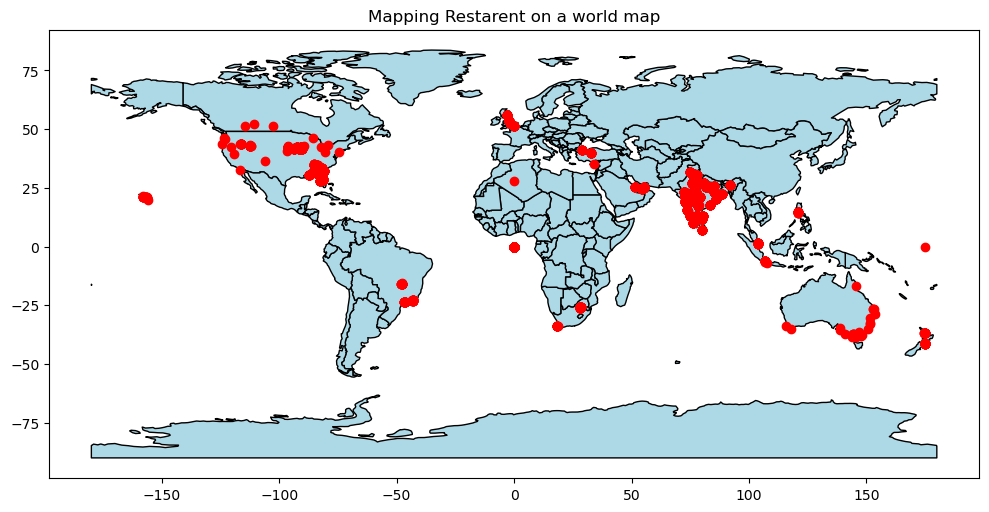

In [58]:
#plot the points from geodataframe om top of the world map
ax=world.plot(figsize=(12,12),color="lightblue",edgecolor='black')
dfg.plot(ax=ax,color='red')
plt.title("Mapping Restarent on a world map")
plt.show()

### Task2:Analysis of Restarent Concentration by city

In [59]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [60]:
#change column name
df.rename(columns={'Restaurant Name':'Number of Restaurant'},inplace=True)

In [61]:
#Groping Restarentbu city
group=df.groupby("City").count()

In [62]:
sort=group.sort_values(by='Number of Restaurant',ascending=False)
a=sort.head(10)

In [63]:
a

,Restaurant ID,Number of Restaurant,Country Code,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
City,,,,,,,,,,,,,,,,,,,,
New Delhi,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473,5473
Gurgaon,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118
Noida,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080,1080
Faridabad,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
Ghaziabad,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Ahmedabad,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Amritsar,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Guwahati,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
Lucknow,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21


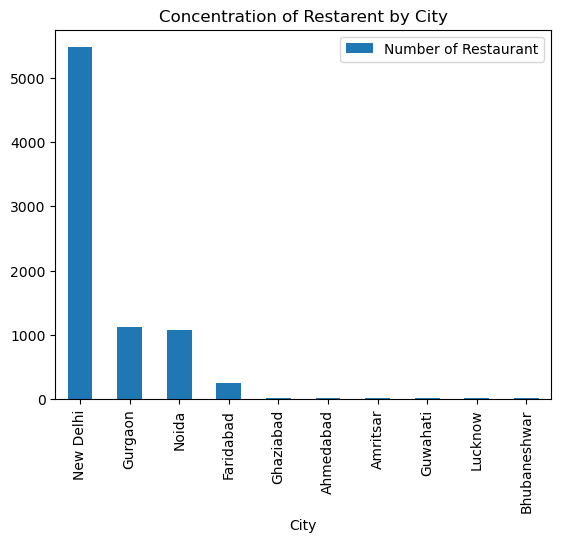

In [64]:
a['Number of Restaurant'].plot(kind='bar',legend=True)
plt.title("Concentration of Restarent by City")
plt.show()

i find New delhi,gurugaon,noida,faridabad this four city has large number Restarent other all of the city has small number of restarent 

### Task3:City wise Statistical analysis of Restarent Rating,cuisines and price range

In [65]:
df.columns

Index(['Restaurant ID', 'Number of Restaurant', 'Country Code', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [66]:
ap=df.groupby("City")['Price range'].mean()
av=df.groupby("City")['Aggregate rating'].mean()
uc=df.groupby("City")["Cuisines"].nunique()
s=pd.DataFrame({"Average Price range":ap,
               'Average Aggregate rating':av,'Unique Cuisines':uc})

In [67]:
s

,Average Price range,Average Aggregate rating,Unique Cuisines
City,,,
Abu Dhabi,3.300000,4.300000,17
Agra,2.650000,3.965000,15
Ahmedabad,2.571429,4.161905,21
Albany,1.823529,3.552941,16
Allahabad,2.650000,3.395000,18
...,...,...,...
Weirton,2.000000,3.900000,1
Wellington City,3.250000,4.250000,17
Winchester Bay,2.000000,3.200000,1


In [68]:
so=s.sort_values(by="Average Price range",ascending=False)

In [69]:
so.head(10)

,Average Price range,Average Aggregate rating,Unique Cuisines
City,,,
Princeton,4.000000,4.000000,1
Inner City,4.000000,4.900000,2
Vineland Station,4.000000,4.300000,1
Johannesburg,4.000000,4.200000,6
Panchkula,4.000000,4.200000,1
Pasay City,4.000000,4.366667,3
Paynesville,4.000000,2.600000,1
Sandton,3.818182,4.300000,10
Mandaluyong City,3.750000,4.625000,4


 top 7 city has highest price range restarent

In [71]:
so.tail(10)

,Average Price range,Average Aggregate rating,Unique Cuisines
City,,,
Faridabad,1.454183,1.866932,87
Dalton,1.400000,4.110000,16
Vernonia,1.000000,4.300000,1
Mc Millan,1.000000,2.400000,1
Dicky Beach,1.000000,3.600000,1
Lakeview,1.000000,3.600000,1
Lakes Entrance,1.000000,3.800000,1
Inverloch,1.000000,3.700000,1
Fernley,1.000000,3.700000,1


last 8 city has lowest prise rate

### Task4: Find Distribution of Restarent Rating and Price

In [73]:
#find corr
cor=df[['Longitude', 'Latitude','Price range', 'Aggregate rating']].corr()

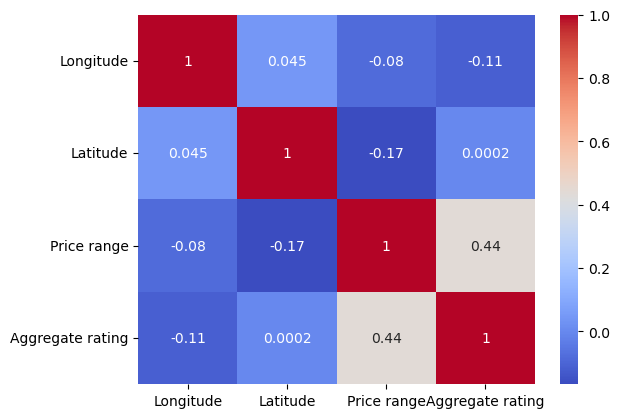

In [74]:
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

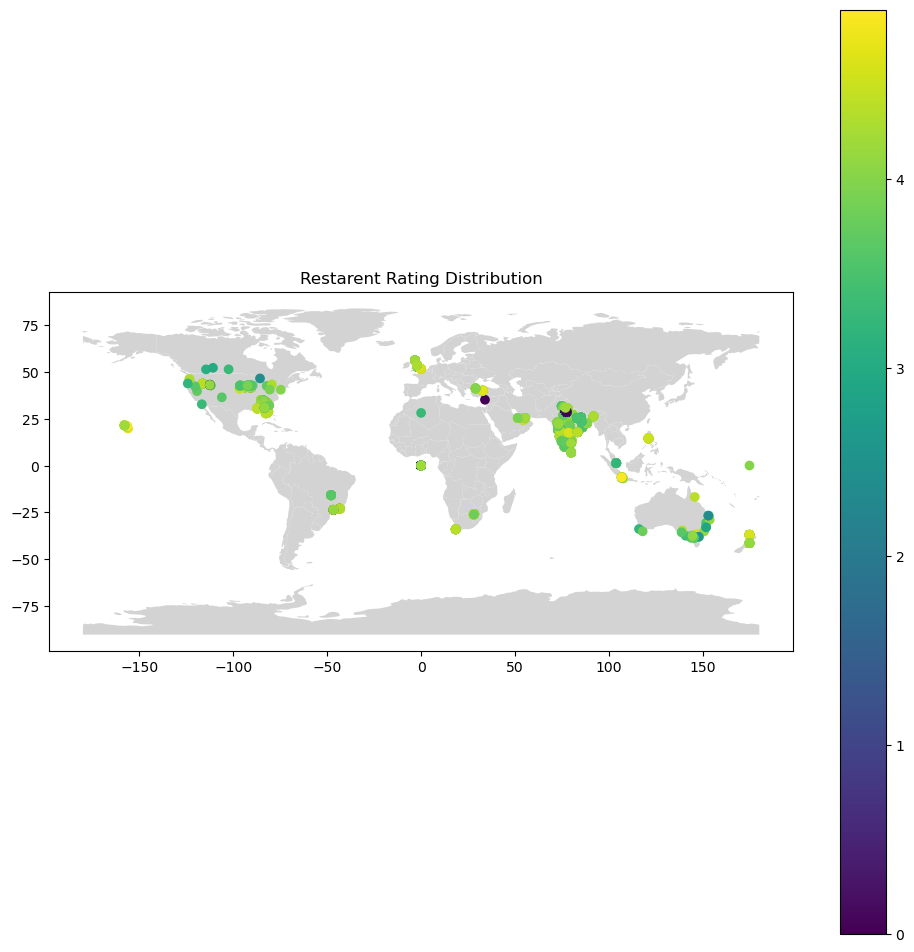

In [77]:
#Analysis Restarent Rating Distribution
lx=world.plot(figsize=(12,12),color="lightgray")
dfg.plot(ax=lx,column='Aggregate rating',legend=True)
plt.title("Restarent Rating Distribution")
plt.show()

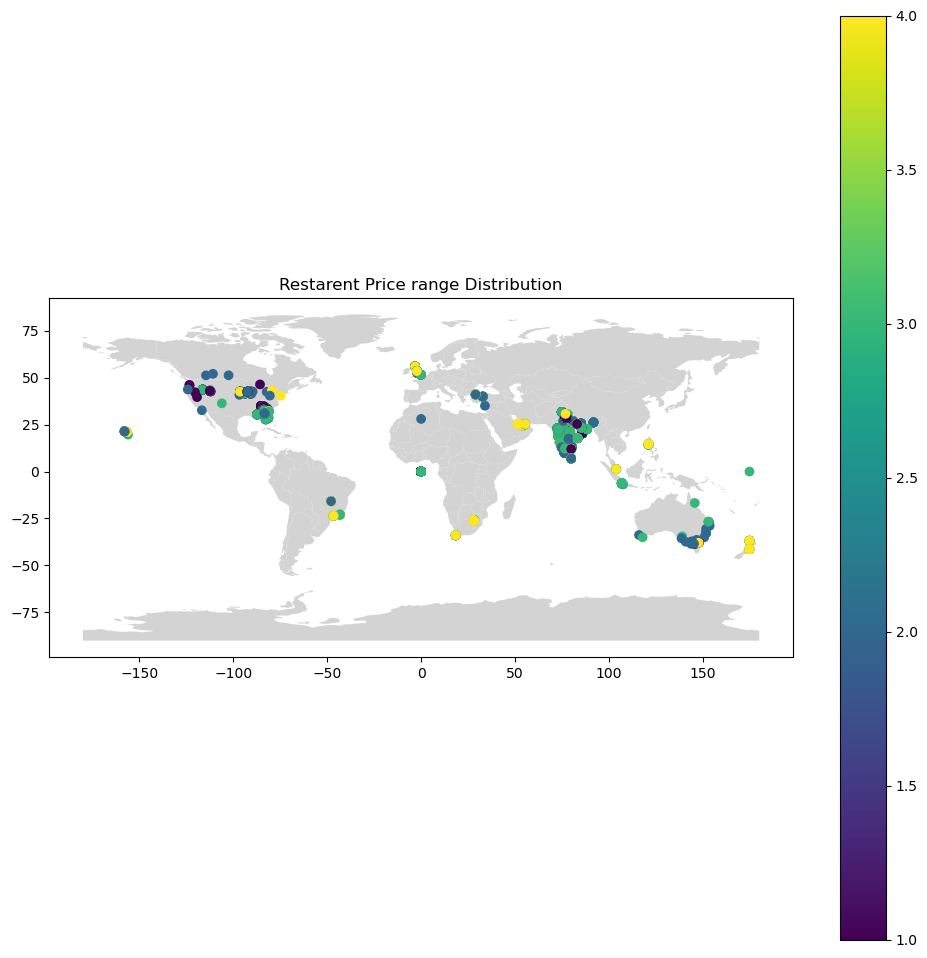

In [79]:
#Analysis Restarent Price Distribution
lx=world.plot(figsize=(12,12),color="lightgray")
dfg.plot(ax=lx,column='Price range',legend=True)
plt.title("Restarent Price range Distribution")
plt.show()

## Thank You